In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [75]:
file_path = "https://github.com/Aparana-dinni/internship-proj/blob/main/diminos_data.csv?raw=true"

In [81]:
df = pd.read_csv(file_path)
dominos_data = df
dominos_data


,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056
...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358


2. Data Understanding

In [82]:
dominos_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB


Check First Order and Last Order

In [83]:
print("First Delivery :", min(dominos_data['order_placed_at']))
print("Last Delivery  :", max(dominos_data['order_placed_at']))

First Delivery : 2023-03-01 00:00:59
Last Delivery  : 2023-03-27 23:58:20


3. Data Processing and Analysis
Change object column to datetime

In [84]:
time_column = ['order_placed_at','order_delivered_at']
for i in time_column:
    dominos_data[i] = pd.to_datetime(dominos_data[i])
    
dominos_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            15000 non-null  int64         
 1   order_placed_at     15000 non-null  datetime64[ns]
 2   order_delivered_at  15000 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1)
memory usage: 351.7 KB


Feature Engineering


In [85]:
dominos_data['day'] = dominos_data['order_placed_at'].dt.day_name()
dominos_data['date'] = dominos_data['order_placed_at'].dt.day
dominos_data['month'] = dominos_data['order_placed_at'].dt.month_name()
dominos_data['year'] = dominos_data['order_placed_at'].dt.year
dominos_data['time'] = dominos_data['order_placed_at'].dt.time

In [87]:
dominos_data


,order_id,order_placed_at,order_delivered_at,day,date,month,year,time
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,1,March,2023,00:00:59
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,1,March,2023,00:03:59
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,1,March,2023,00:07:22
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,1,March,2023,00:07:47
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,1,March,2023,00:09:03
...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,27,March,2023,23:37:05
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Monday,27,March,2023,23:47:38
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Monday,27,March,2023,23:50:16
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Monday,27,March,2023,23:52:44


Check the total delivery time

In [89]:
dominos_data['delivery_min'] = dominos_data['order_delivered_at'] - dominos_data['order_placed_at']


In [90]:
dominos_data


,order_id,order_placed_at,order_delivered_at,day,date,month,year,time,delivery_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,1,March,2023,00:00:59,0 days 00:17:08.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,1,March,2023,00:03:59,0 days 00:15:35.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,1,March,2023,00:07:22,0 days 00:15:06.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,1,March,2023,00:07:47,0 days 00:38:32.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,1,March,2023,00:09:03,0 days 00:16:10.619056
...,...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,27,March,2023,23:37:05,0 days 00:15:32.409378
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Monday,27,March,2023,23:47:38,0 days 00:16:44.672912
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Monday,27,March,2023,23:50:16,0 days 00:15:24.676238
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Monday,27,March,2023,23:52:44,0 days 00:15:57.810358


In [91]:
dominos_data['delivery_min'] = dominos_data['delivery_min'].dt.total_seconds() / 60


In [92]:
dominos_data


,order_id,order_placed_at,order_delivered_at,day,date,month,year,time,delivery_min
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,1,March,2023,00:00:59,17.140719
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,1,March,2023,00:03:59,15.598754
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,1,March,2023,00:07:22,15.104856
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,1,March,2023,00:07:47,38.533657
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,1,March,2023,00:09:03,16.176984
...,...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,27,March,2023,23:37:05,15.540156
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Monday,27,March,2023,23:47:38,16.744549
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Monday,27,March,2023,23:50:16,15.411271
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Monday,27,March,2023,23:52:44,15.963506


Time Partition


In [93]:
dominos_data['time_period'] = dominos_data['order_placed_at'].apply(lambda x: "4AM - 9AM" if x.hour > 4 and x.hour <= 9 else ("10AM - 3PM" if x.hour > 10 and x.hour <= 15 else ("4PM - 9PM" if x.hour > 16 and x.hour <= 21 else "10PM - 3AM")))


In [94]:
dominos_data


,order_id,order_placed_at,order_delivered_at,day,date,month,year,time,delivery_min,time_period
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132,Wednesday,1,March,2023,00:00:59,17.140719,10PM - 3AM
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241,Wednesday,1,March,2023,00:03:59,15.598754,10PM - 3AM
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385,Wednesday,1,March,2023,00:07:22,15.104856,10PM - 3AM
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399,Wednesday,1,March,2023,00:07:47,38.533657,10PM - 3AM
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056,Wednesday,1,March,2023,00:09:03,16.176984,10PM - 3AM
...,...,...,...,...,...,...,...,...,...,...
14995,1538106,2023-03-27 23:37:05,2023-03-27 23:52:37.409378,Monday,27,March,2023,23:37:05,15.540156,10PM - 3AM
14996,1538107,2023-03-27 23:47:38,2023-03-28 00:04:22.672912,Monday,27,March,2023,23:47:38,16.744549,10PM - 3AM
14997,1538108,2023-03-27 23:50:16,2023-03-28 00:05:40.676238,Monday,27,March,2023,23:50:16,15.411271,10PM - 3AM
14998,1538109,2023-03-27 23:52:44,2023-03-28 00:08:41.810358,Monday,27,March,2023,23:52:44,15.963506,10PM - 3AM


4. Univariate Analysis - Delivery Min


In [95]:
dominos_data["delivery_min"].describe()


count    15000.000000
mean        20.499389
std         96.160362
min         15.000010
25%         15.274826
50%         15.797986
75%         17.279661
max       7299.831375
Name: delivery_min, dtype: float64

In [96]:
dominos_data["delivery_min"].mean()


20.499389326467778

In [97]:
dominos_data["delivery_min"].median()


15.797986066666667

In [98]:
dominos_data["delivery_min"].min()


15.000010333333334

In [99]:
dominos_data["delivery_min"].max()


7299.831374933333

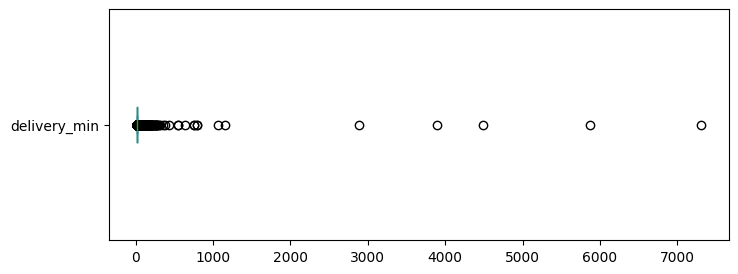

In [100]:
dominos_data.delivery_min.plot(kind='box', vert=False, figsize=(8,3));


Detect Outliers


In [101]:
outliers = dominos_data[dominos_data.delivery_min >= 45]
outliers

,order_id,order_placed_at,order_delivered_at,day,date,month,year,time,delivery_min,time_period
24,1523135,2023-03-01 01:11:53,2023-03-01 05:07:54.563978,Wednesday,1,March,2023,01:11:53,236.026066,10PM - 3AM
117,1523228,2023-03-01 04:59:04,2023-03-01 18:06:52.046891,Wednesday,1,March,2023,04:59:04,787.800782,10PM - 3AM
174,1523285,2023-03-01 07:22:11,2023-03-01 08:12:51.906470,Wednesday,1,March,2023,07:22:11,50.681774,4AM - 9AM
408,1523519,2023-03-01 18:05:17,2023-03-01 19:46:42.833697,Wednesday,1,March,2023,18:05:17,101.430562,4PM - 9PM
415,1523526,2023-03-01 18:39:52,2023-03-01 19:26:50.712489,Wednesday,1,March,2023,18:39:52,46.978541,4PM - 9PM
...,...,...,...,...,...,...,...,...,...,...
14593,1537704,2023-03-27 05:57:43,2023-03-27 07:01:35.117442,Monday,27,March,2023,05:57:43,63.868624,4AM - 9AM
14603,1537714,2023-03-27 06:32:17,2023-03-27 07:29:10.364276,Monday,27,March,2023,06:32:17,56.889405,4AM - 9AM
14741,1537852,2023-03-27 12:55:37,2023-03-27 13:52:53.206025,Monday,27,March,2023,12:55:37,57.270100,10AM - 3PM
14841,1537952,2023-03-27 16:42:37,2023-03-27 17:43:13.294744,Monday,27,March,2023,16:42:37,60.604912,10PM - 3AM


Obeservation:
Total 262 Order I removed which is more than 45 min taken.
Note - Need to talk with Store Manager what is there actual problem If genuine problem then we go to remove these outliers.

In [102]:
clean_time = dominos_data[dominos_data.delivery_min <= 45]
clean_time["delivery_min"].describe()


count    14738.000000
mean        17.109862
std          3.765858
min         15.000010
25%         15.268361
50%         15.770326
75%         17.140946
max         44.899112
Name: delivery_min, dtype: float64

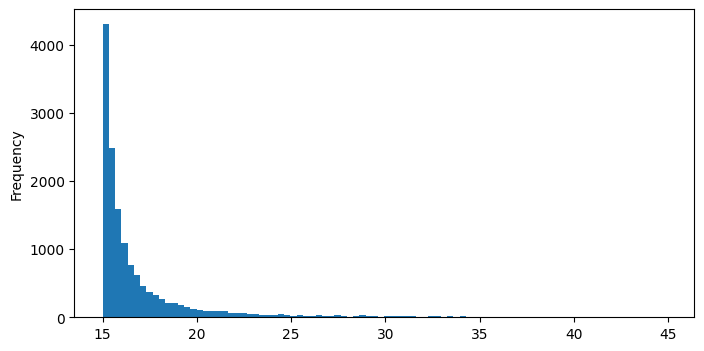

In [103]:
clean_time["delivery_min"].mean()
clean_time["delivery_min"].median()
clean_time["delivery_min"].min()
clean_time["delivery_min"].max()
clean_time["delivery_min"].plot(kind='hist', bins=90, figsize=(8,4));




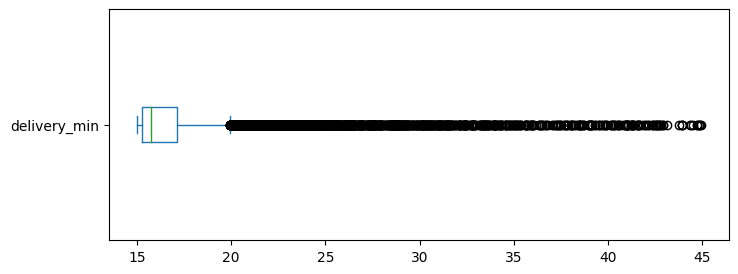

In [104]:
clean_time["delivery_min"].plot(kind='box', vert=False, figsize=(8,3));


Check the total number of late delevery


In [106]:
late_delivery = clean_time[clean_time["delivery_min"] >= 31]
print("Total late delivery After remove Outliers :", late_delivery["delivery_min"].count())

Total late delivery After remove Outliers : 295


In [107]:
late_delivery = dominos_data[dominos_data["delivery_min"] >= 31]
print("Total late delivery :", late_delivery["delivery_min"].count())

Total late delivery : 557


Obeservation:
Here I seen total 557 delivery are late or taken delivery time more than 31 min.

In [108]:
tatal_delivery = dominos_data['delivery_min'].count() - late_delivery['delivery_min'].count() # After the removing outliers
print("Total on time delivery :", tatal_delivery)

Total on time delivery : 14443


In [109]:
print("Delivery performance in percentage:", 14443 / 15000 * 100) # without removing outliers


Delivery performance in percentage: 96.28666666666666


In [110]:
print("95th percentile :", dominos_data['delivery_min'].quantile(0.95))


95th percentile : 27.261043996666658


**bold text**
Average loss in dominos


In [111]:
print("Total Average Loss: ", 557 * 500, "RS")

Total Average Loss:  278500 RS



Obeservation:
Total 14443 Order 96.28 % of total order on time deleverd.
95th percentile delivery time = 27.26 min
Domino's offers free delivery if the order is more than 31 minutes, thus the store's loss is Rs 278 500.
> Indented block



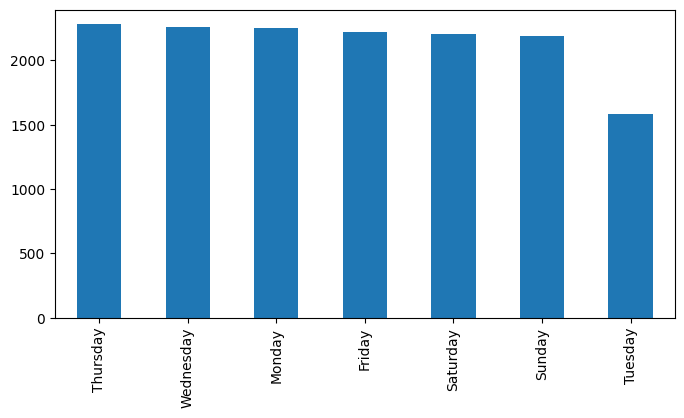

In [112]:
dominos_data['day'].value_counts().plot(kind='bar', figsize=(8,4));


Observation:
Thursday is higest order : Total 2280 order
Check the Delivery mean time day wise

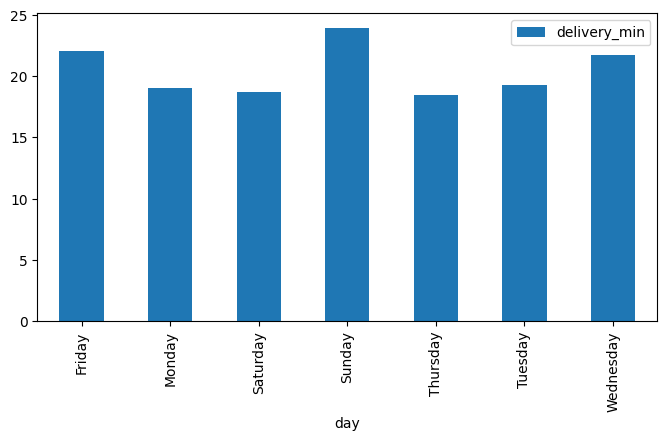

In [113]:
dominos_data[['day', 'delivery_min']].groupby('day').mean().plot(kind='bar', figsize=(8,4));


Final Report:
1. Average daily Transaction is = 555
2. High Transaction = 597 (20th March)
3. Low Transaction = 492 (14th March)
4. More order in time = 4-5AM, 11AM and 10-11PM
5. Highest Transaction on Thursday
6. Lowest Transaction on Tuesday
7. 96.28% on time delivery remaining is failed to on time delivery
8. Average delivery time 17.10 min (After removing outliers)
9. 95th percentile of delivery time : 27.26 min
Domino's offers free delivery if the order is more than 31 minutes, thus the store's loss is Rs 2,78,500
Almost Dominos store running good and service as well really good..